# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Principal Component Analysis (PCA)

### 3.1 – (0.5 puntos) Estandarización y normalización de datos. 
#### Para evitar que las diferencias de rango en los datos supongan un problema a la hora de procesar la información, el primer paso es estandarizar y normalizar los datos. Usad el método StandardScaler de la librería scikit-learn.

In [1]:
%config IPCompleter.greedy=True
%reset
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
np.set_printoptions(suppress=True)
#Importamos Librería PCA de Scikit Learn
from sklearn.decomposition import PCA

#Importamos el CSV del FIFA
df_fifa = pd.read_csv('fifa19.csv')

#Sacamos por pantalla los primeros datos para ver el dataset
df_fifa.head(10)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


### Sacamos algunos datos interesantes para utilizar más adelante

In [2]:
#Índices para los jugadores
#Delanteros
#Messi
indiceMessi = df_fifa.index[df_fifa['Name'] == "L. Messi"]
#Cristiano Ronaldo
indiceCR = df_fifa.index[df_fifa['Name'] == "Cristiano Ronaldo"]
#Mbappé
indiceMbappe = df_fifa.index[df_fifa['Name'] == "K. Mbappé"]

#Mediocampistas
#Pogba
indicePogba = df_fifa.index[df_fifa['Name'] == "P. Pogba"]
#Kroos
indiceKroos = df_fifa.index[df_fifa['Name'] == "T. Kroos"]

#Defensas
#Ramos
indiceRamos = df_fifa.index[df_fifa['Name'] == "Sergio Ramos"]
#Van Dijk
indiceVirgil = df_fifa.index[df_fifa['Name'] == "V. van Dijk"]

#Porteros
#Oblak
indiceOblak = df_fifa.index[df_fifa['Name'] == "J. Oblak"]
#Casillas
indiceCasillas = df_fifa.index[df_fifa['Name'] == "Casillas"]

#Vamos a coger 2 "malos"
indice1 = df_fifa.index[df_fifa['Name'] == "A. Perea"]
indice2 = df_fifa.index[df_fifa['Name'] == "R. Bennett"]

### Limpieza de datos

In [3]:
#Limpieza de datos
print('Tamaño sin limpiar',df_fifa.shape[0])
#Quitamos columnas innecesarias# Para estandarizar y normalizar solo nos valen los valores numericos por lo que eliminamos todos los que sean string
df = df_fifa.select_dtypes(exclude=['object'])
df = df.drop(columns=['Unnamed: 0','ID','Jersey Number'])
#Eliminación de nulos
df = df.dropna()
print('Tamaño sin nulos',df.shape[0])

#Eliminación de duplicados
df = df.drop_duplicates()
print('Tamaño sin duplicados',df.shape[0])

#Reseteamos el índice de las filas
df = df.reset_index()
df = df.drop(columns=['index'])

#Imprimimos los datos
df.head()

Tamaño sin limpiar 18207
Tamaño sin nulos 18159
Tamaño sin duplicados 18157


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Dataset Limpio

## Procesamiento de Datos

In [4]:
#Separo entre datos y objetivo
valores = ['Overall','Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
x = df.loc[:, valores].values
pd.DataFrame(data=x,columns=valores)

,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94.0,94.0,2202.0,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94.0,94.0,2228.0,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92.0,93.0,2143.0,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91.0,93.0,1471.0,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91.0,92.0,2281.0,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18152,47.0,65.0,1307.0,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18153,47.0,63.0,1098.0,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18154,47.0,67.0,1189.0,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18155,47.0,66.0,1228.0,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


### Hemos eliminado todas las columnas con valores string

#### Hemos realizado esto ya que también podríamos estandarizar esos valores pero estaríamos manipulando los datos y podríamos influir de un modo u otro sobre los mismos. Por ello nos quedamos solo con aquellos que tengan valor numérico

## Procedemos a estandarizar y normalizar los datos

In [5]:
#Pasamos a estandarizar y normalizar los datos con la librería StandardScaler
scaler = StandardScaler()
transformado = scaler.fit_transform(x)

In [6]:
print('Dataset transformado')
#Dataframe de estos datos
df = pd.DataFrame(data = transformado, columns = valores).head()
df.head()

Dataset transformado


,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,4.013637,3.697351,2.214065,9.863890,1.593865,2.167540,1.865997,2.532784,1.018591,2.130412,...,1.684706,3.266901,-0.717669,-0.909300,-0.923563,-0.599975,-0.318938,-0.074708,-0.140276,-0.485166
1,4.013637,3.697351,2.309352,9.863890,1.593865,3.490165,1.865997,2.481566,2.111816,1.518127,...,2.321549,3.179444,-0.968881,-0.770822,-1.064477,-0.543464,-0.318938,-0.074708,-0.140276,-0.318086
2,3.724377,3.534338,1.997834,9.863890,3.107929,3.490165,1.593729,2.123045,0.558285,1.722222,...,2.066812,3.091986,-1.019124,-1.093936,-0.594762,-0.430442,-0.437231,-0.074708,-0.081573,-0.318086
3,3.579747,3.534338,-0.464993,7.326076,0.079802,-1.800335,-1.782399,-1.667035,-1.800779,-0.590857,...,-0.544243,0.818090,-1.622033,-1.232414,-1.534193,4.146949,4.057894,4.288106,4.203721,4.304444
4,3.579747,3.371325,2.503593,7.326076,3.107929,2.167540,2.356080,1.866959,0.155518,2.266476,...,1.939443,2.567241,1.040815,0.475475,0.250726,-0.091376,-0.200646,-0.680654,-0.375087,-0.206700


### 3.2 – (2 puntos) Autovalores y Autovectores
#### El siguiente paso es obtener los autovalores y autovectores que nos permitan caracterizar el espacio de llegada de la proyección donde vamos a reducir la dimensión de nuestros datos, estudiando cuántos componentes (dimensiones) necesitamos para representar los datos iniciales. Para esto, primero hay que obtener la matriz de covarianza utilizando el método cov de la librería numpy, y luego obtener los autovalores/autovectores de la matriz utilizando el método linalg.eig también de la librería numpy. Al final de este apartado, tienes que obtener un DataFrame con el porcentaje de varianza y el porcentaje acumulado por cada componente. Además, tienes que explicar qué quieren decir estos datos y cómo se relacionan con los datos.

### Cálculo de la Matriz de Covarianza

In [7]:
#Ya tenemos calculada la matriz con los datos normalizados, por lo que procedemos a obtener la matriz de covarianza
matrizCovarianza = np.cov(transformado,rowvar=False)
print('Matriz de Covarianza')
pd.DataFrame(data = matrizCovarianza, columns = valores).head()

Matriz de Covarianza


,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1.000055,0.661204,0.607225,0.499605,0.212035,0.414374,0.394922,0.332420,0.340763,0.502507,...,0.341309,0.727641,0.286727,0.252752,0.222889,-0.025888,-0.025009,-0.029312,-0.017625,-0.023243
1,0.661204,1.000055,0.384584,0.373041,0.162353,0.354270,0.246289,0.243314,0.200975,0.369170,...,0.224226,0.440004,0.162901,0.143617,0.129012,-0.053426,-0.054650,-0.059036,-0.052568,-0.053328
2,0.607225,0.384584,1.000055,0.292268,0.341882,0.763461,0.866453,0.724254,0.644449,0.906771,...,0.734547,0.752366,0.562079,0.538925,0.507052,-0.674672,-0.673660,-0.670282,-0.668308,-0.673284
3,0.499605,0.373041,0.292268,1.000055,0.128327,0.208244,0.191817,0.178438,0.157515,0.242865,...,0.218710,0.392951,0.115187,0.092834,0.079172,0.004515,0.003930,0.000636,0.006892,0.003436
4,0.212035,0.162353,0.341882,0.128327,1.000055,0.340777,0.307947,0.357456,0.183250,0.322161,...,0.330300,0.278187,0.065692,0.042655,0.026110,-0.231917,-0.233109,-0.229406,-0.231310,-0.232586


La matriz de covarianza implica como de correlacionados están los datos, esto quiere decir cuanto influye un dato sobre otro, por eso si apreciamos la diagonal principal tenemos valores de 1. Si comparamos en cambio por ejemplo como se correlacionan para cada valor los datos vemos que fuera de la diagonal principal estos fluctúan en función de los datos originales que es de los que hemos obtenido la matriz de covarianza.

### Cálculo de Autovectores y Autovalores

In [8]:
df_autov = pd.DataFrame({"autovalores" : [], "autovectores" : []})
autovalores, autovectores = np.linalg.eig(matrizCovarianza)
df_autov['autovalores'] = autovalores
df_autov['autovectores'] = [autovectores[:,i] for i in range(len(autovectores))]
print('Autovalores y Autovectores')
print('Tamaño Autovalores',df_autov['autovalores'].shape[0])
print('Tamaño Autovectores',df_autov['autovectores'].shape[0])
df_autov.head()

Autovalores y Autovectores
Tamaño Autovalores 40
Tamaño Autovectores 40


,autovalores,autovectores
0,20.892691,"[0.10191624395746321, 0.07274329019148609, 0.2..."
1,5.020337,"[0.011799091394186495, -0.027926873999252196, ..."
2,3.676162,"[-0.4258505110973335, -0.28747323823649235, -0..."
3,1.747022,"[0.030979363883975576, 0.13330147329447686, 0...."
4,1.357275,"[-0.1196372544115988, -0.13311836530887936, 0...."


Los autovalores y autovectores nos servirán para poder calcular las componentes sobre los que estudiaremos nuestros datos. Esto viene determinado por el número de Componentes que queremos. Cogeremos los n primeros valores de nuestros autovectores siendo n el número de Componentes a emplear. Los autovalores y autovectores nos sirven para calcular las transformaciones que han sufrido nuestros datos.

### Cálculo del porcentaje de varianza y porcentaje de varianza acumulado

In [9]:
df_varianza = pd.DataFrame({"% varianza" : [], "% acumulado" : []})
#Calculamos el porcentaje de varianza de los autovalores
porcentaje = (autovalores / autovalores.sum())*100
df_varianza['% varianza'] = porcentaje

In [10]:
df_varianza = df_varianza.sort_values('% varianza',ascending=False)
df_varianza.head()

,% varianza,% acumulado
0,52.228851,NaN
1,12.550150,NaN
2,9.189898,NaN
3,4.367316,NaN
4,3.393002,NaN


In [11]:
#Porcentaje de varianza acumulado
acumulado = np.cumsum([i*(100/sum(autovalores)) for i in autovalores])
df_varianza['% acumulado'] = acumulado
print('Porcentaje de Varianza y Porcentaje Acumulado')
df_varianza.head(10)

Porcentaje de Varianza y Porcentaje Acumulado


,% varianza,% acumulado
0,52.228851,52.228851
1,12.550150,64.779001
2,9.189898,73.968900
3,4.367316,78.336215
4,3.393002,81.729217
5,2.174722,83.903939
6,2.094471,85.998410
7,1.808042,87.806452
8,1.359733,89.166185
9,0.974934,90.141120


A partir del porcentaje de varianza y el porcentaje de varianza acumulado podemos calcular la pérdida de información que vamos a sufrir. Por ejemplo, si cogieramos 5 componentes en este ejemplo estaríamos representando un 81.72% de la información, por lo que tendríamos una pérdida de datos cercana al 20%. No es muy drástico este nivel de pérdida de información, si bien podríamos intentar llegar a valores más cercanos al 90%. Para ello deberíamos coger los 10 primeros valores de nuestros autovectores y definir a partir de cada uno de ellos, una componente.

### Cálculo de Componentes

In [12]:
#Como los autovalores mas grandes son los dos primeros, cogemos los dos primeros
df_componentes = pd.DataFrame({'Componente 1': [], 'Componente 2': [], 'Atributo': []})
df_componentes['Componente 1'] = df_autov["autovectores"].loc[0]
df_componentes['Componente 2'] = df_autov["autovectores"].loc[1]
df_componentes['Atributo'] = valores
df_componentes

,Componente 1,Componente 2,Atributo
0,0.101916,0.011799,Overall
1,0.072743,-0.027927,Potential
2,0.210666,0.017318,Special
3,0.051104,-0.015223,International Reputation
4,0.080115,-0.086744,Weak Foot
5,0.179823,-0.120012,Skill Moves
6,0.191001,-0.034430,Crossing
7,0.171975,-0.212140,Finishing
8,0.154389,0.179716,HeadingAccuracy
9,0.201433,0.037899,ShortPassing


Obtenemos las componentes. En este caso y como hemos comentado con anterioridad, seleccionamos sólo 2 puesto que se pide realizar una representación en X e Y, pero si realmente quisiéramos interpretar los datos sin tanta pérdida de información deberíamos tener en torno a 10 componentes. Si analizamos cada una de las componentes, la primera pesa mucho más aspectos atacantes como la precisión o la reputación internacional. Respecto a la Componente 2, ponderan mucho más los valores defensivos como el marcaje.

### 3.3 – (1 punto) Representar gráficamente los elementos del dataset
#### Finalmente, queremos representar gráficamente los elementos de nuestro dataset utilizando la descomposición que hemos calculado en el apartado 3.2. Obtén un diagrama de dispersión en 2 dimensiones y comenta/interpreta el resultado. Es necesario que el diagrama contenga toda la información necesaria. Además, tienes que interpretar la información que proporciona el eje X y el eje Y. Para terminar, elige al menos 4 individuos ¿qué puedes decir de ellos después del análisis que has realizado?

#### Transponemos los componentes para poder multiplicarlos correctamente.

In [13]:
#Eliminamos la columna de los atributos a los que representa cada fila
df_componentes = df_componentes.drop(columns=['Atributo'])
df_componentesT = df_componentes.T
df_componentesT.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Componente 1,0.101916,0.072743,0.210666,0.051104,0.080115,0.179823,0.191001,0.171975,0.154389,0.201433,...,0.172747,0.153285,0.115980,0.109232,0.102095,-0.180641,-0.180353,-0.179637,-0.179585,-0.180458
Componente 2,0.011799,-0.027927,0.017318,-0.015223,-0.086744,-0.120012,-0.034430,-0.212140,0.179716,0.037899,...,-0.140078,0.009913,0.335434,0.358345,0.361225,-0.091007,-0.091541,-0.091925,-0.089969,-0.091043


#### Transponemos también nuestra matriz de datos normalizados

In [14]:
transformadoT = transformado.T
datos = pd.DataFrame(data = transformadoT)
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,18147,18148,18149,18150,18151,18152,18153,18154,18155,18156
0,4.013637,4.013637,3.724377,3.579747,3.579747,3.579747,3.579747,3.579747,3.579747,3.435117,...,-2.783975,-2.783975,-2.783975,-2.783975,-2.783975,-2.783975,-2.783975,-2.783975,-2.783975,-2.928605
1,3.697351,3.697351,3.534338,3.534338,3.371325,3.208311,3.208311,3.208311,3.208311,3.534338,...,-1.682089,-0.214969,-0.377982,-1.519076,-0.540996,-1.030036,-1.356062,-0.704009,-0.867022,-0.867022
2,2.214065,2.309352,1.997834,-0.464993,2.503593,1.994169,2.499928,2.741813,2.210400,-0.978082,...,-0.864469,-2.953474,-1.080700,-1.447192,-1.832008,-1.066040,-1.832008,-1.498501,-1.355569,-1.014731
3,9.863890,9.863890,9.863890,7.326076,7.326076,7.326076,7.326076,9.863890,7.326076,4.788261,...,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368,-0.287368
4,1.593865,1.593865,3.107929,0.079802,3.107929,1.593865,1.593865,1.593865,0.079802,0.079802,...,0.079802,-1.434262,0.079802,-1.434262,0.079802,-1.434262,-1.434262,0.079802,0.079802,0.079802


#### Multiplicamos los componentes por nuestros datos y sacamos los valores a representar en cada Componente

In [15]:
multi = df_componentesT.dot(datos)
multi = multi.T
multi.head()

,Componente 1,Componente 2
0,10.133067,-5.592086
1,10.164192,-4.179060
2,9.716677,-5.583195
3,-7.450273,-2.306407
4,10.039187,-2.066547


#### Guardamos los datos a pintar en el mapa

In [16]:
datosX = multi['Componente 1']
datosY = multi['Componente 2']
#Messi
datosMessiX = multi['Componente 1'][indiceMessi]
datosMessiY = multi['Componente 2'][indiceMessi]
#Cristiano Ronaldo
datosCRX = multi['Componente 1'][indiceCR]
datosCRY = multi['Componente 2'][indiceCR]
#Mbappe
datosKMX = multi['Componente 1'][indiceMbappe]
datosKMY = multi['Componente 2'][indiceMbappe]
#Pogba
datosPPX = multi['Componente 1'][indicePogba]
datosPPY = multi['Componente 2'][indicePogba]
#Kroos
datosTKX = multi['Componente 1'][indiceKroos]
datosTKY = multi['Componente 2'][indiceKroos]
#Ramos
datosSRX = multi['Componente 1'][indiceRamos]
datosSRY = multi['Componente 2'][indiceRamos]
#Van Dijk
datosVVX = multi['Componente 1'][indiceVirgil]
datosVVY = multi['Componente 2'][indiceVirgil]
#Oblak
datosJOX = multi['Componente 1'][indiceOblak]
datosJOY = multi['Componente 2'][indiceOblak]
#Casillas
datosICX = multi['Componente 1'][indiceCasillas]
datosICY = multi['Componente 2'][indiceCasillas]
#Jugadores Malos
datosM1X = multi['Componente 1'][indice1]
datosM1Y = multi['Componente 2'][indice1]

datosM2X = multi['Componente 1'][indice2]
datosM2Y = multi['Componente 2'][indice2]

### Pintando los datos

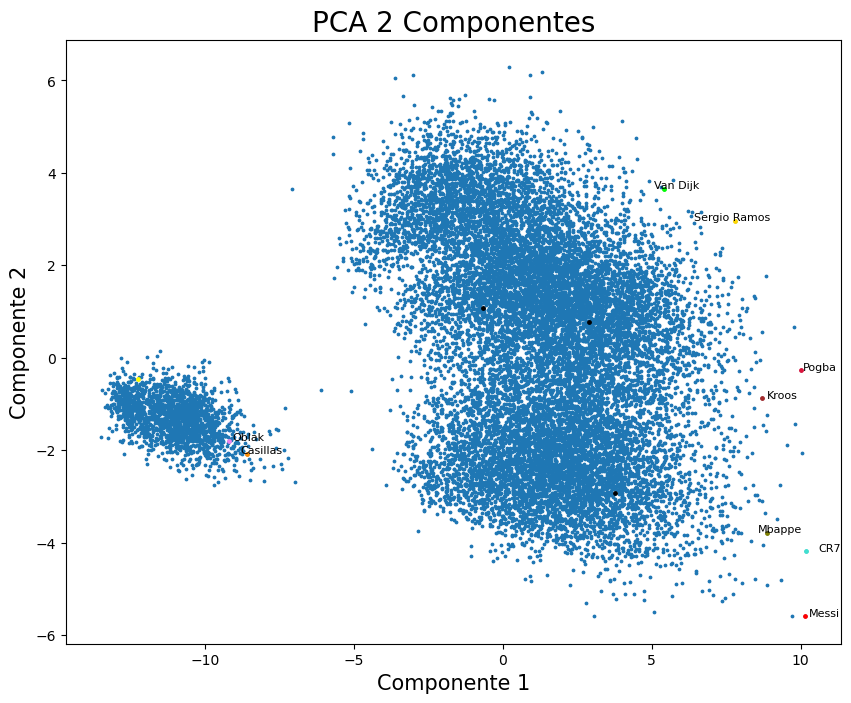

In [17]:
#Pintamos los datos
fig = plt.figure(figsize = (10,8), dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)
rng = np.random.RandomState(0)
colors = rng.rand(18157)

ax.scatter(datosX,datosY,s=3)

#Messi
ax.scatter(datosMessiX,datosMessiY,c='r',s=6)
ax.text(datosMessiX+1.2,datosMessiY,'Messi',horizontalalignment='right',fontsize=8)
#Cristiano Ronaldo
ax.scatter(datosCRX,datosCRY,c='turquoise',s=6)
ax.text(datosCRX+1.2,datosCRY,'CR7',horizontalalignment='right',fontsize=8)
#Mbappe
ax.scatter(datosKMX,datosKMY,c='olive',s=6)
ax.text(datosKMX+1.2,datosKMY,'Mbappe',horizontalalignment='right',fontsize=8)

#Pogba
ax.scatter(datosPPX,datosPPY,c='crimson',s=6)
ax.text(datosPPX+1.2,datosPPY,'Pogba',horizontalalignment='right',fontsize=8)

#Kroos
ax.scatter(datosTKX,datosTKY,c='brown',s=6)
ax.text(datosTKX+1.2,datosTKY,'Kroos',horizontalalignment='right',fontsize=8)

#Ramos
ax.scatter(datosSRX,datosSRY,c='gold',s=6)
ax.text(datosSRX+1.2,datosSRY,'Sergio Ramos',horizontalalignment='right',fontsize=8)

#Van Dijk
ax.scatter(datosVVX,datosVVY,c='lime',s=6)
ax.text(datosVVX+1.2,datosVVY,'Van Dijk',horizontalalignment='right',fontsize=8)

#Oblak
ax.scatter(datosJOX,datosJOY,c='violet',s=6)
ax.text(datosJOX+1.2,datosJOY,'Oblak',horizontalalignment='right',fontsize=8)

#Casillas
ax.scatter(datosICX,datosICY,c='darkorange',s=6)
ax.text(datosICX+1.2,datosICY,'Casillas',horizontalalignment='right',fontsize=8)

#Jugadores Malos
ax.scatter(datosM1X,datosM1Y,c='yellow',s=6)
ax.scatter(datosM2X,datosM2Y,c='black',s=6)

plt.show()

En el gráfico de dispersión mostrado se pueden diferenciar dos grupos, el primero, que corresponde al más pequeño estaría agrupando a los porteros, mientras que el grande agrupa a los jugadores de campo. Como podemos observar en las etiquetas mostradas, los grandes porteros están agrupados en la zona inferior de la componente 2 y acercandose a los valores mayores que el resto pero sin llegar a dispersarse hacia la zona central, esto nos puede dar cierta información sobre sus habilidades tanto de portero como la mejora en las habilidades que comparten con los jugadores del campo. 
En cuanto al grupo grande, los jugadores más mediocres se situan dentro de la agrupación, a diferencia de los grandes jugadores que se alejan de esta agrupación y se dispersan hacia los valores más altos de la componente 1.

### Representación de los ejes X e Y

Si nos vamos al apartado de componentes, podemos ver a qué atributo representa cada una de ellas. Nosotros en nuestro ejemplo hemos utilizado la Componente 1 para representar el Eje X y la Componente Y para representar el Eje Y. Al ver los datos entendemos de mejor modo qué representa con más fuerza cada una de las Componentes. Si bien, la Componente 1 se centra más en los datos cualitativos de los jugadores, sobre todo en el apartado de ataque,si bien para los porteros estudia sus datos también pero les da un valor negativo. De ahí, que estén situados más a la izquierda en el gráfico.

Respecto a la Componente 2, se centra en aspectos sobre todo defensivos como la agresividad o la dureza de las entradas. Por ello podemos ver cómo los defensas son los que más arriba se sitúan en el gráfico mientras que los delanteros se colocan por abajo en el gráfico. Los porteros, no son un jugador de campo pero al ser la última parte de la defensa tendrán ciertos valores defensivos que les hace situarese por encima de los delanteros más destacados, más o menos en la línea de los centrocampistas.


Respecto a los jugadores elegidos, se nos pedía que eligiéramos al menos 4 y aportásemos qué información se estaba representando en el Eje X y cuál en el Eje Y. Nosotros hemos seleccionado alguno más para ver como se diferencian. Respecto a Messi o Cristiano Ronaldo vemos como ambos están francamente distanciados de los demás datos dejando claro que son los dos mejores jugadores del juego. Conforme vamos avanzando, podemos ver que Mbappé, estando más cerca de los "mortales" sigue también distanciándose algo más. Jugadores como Sergio Ramos o Van Dijk se distancian también pero cerca de los demás. Los puntos negros representan a jugadores de la media y vemos como están dentro de la masa grande de dispersión de los datos. En cuanto a los porteros, las difewrencias no son tan notables.

### 3.4- (0.5 punto) Repite los pasos 3.2 y 3.3 utilizando las funcionalidades disponibles en la librería scikitlearn.
#### Compara los resultados y coméntalos. ¿Hay alguna diferencia notable entre las dos implementaciones?

### DataFrame con datos originales

In [18]:
#Saco los datos
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Limpieza de los datos

In [19]:
#Limpiamos datos de df_fifa
#Limpieza de datos
print('Tamaño sin limpiar',df.shape[0])
#Quitamos columnas innecesarias# Para estandarizar y normalizar solo nos valen los valores numericos por lo que eliminamos todos los que sean string
df = df_fifa.select_dtypes(exclude=['object'])
df = df.drop(columns=['Unnamed: 0','ID','Jersey Number'])
#Eliminación de nulos
df = df.dropna()
print('Tamaño sin nulos',df.shape[0])

#Eliminacion de duplicados
df = df.drop_duplicates()
print('Tamaño sin duplicados',df.shape[0])

#Reseteamos el índice de las filas
df = df.reset_index()
df = df.drop(columns=['index'])

#Imprimimos los datos
df.head()

Tamaño sin limpiar 5
Tamaño sin nulos 18159
Tamaño sin duplicados 18157


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Seleccionamos las columnas que nos interesan

In [20]:
features = ['Overall','Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
x = df.loc[:, features].values

In [21]:
y = df.loc[:,['Overall']].values

### Transformamos los datos y los normalizamos

In [22]:
#Estandarizamos los datos
x = StandardScaler().fit_transform(x)

In [23]:
#Dataframe de estos datos
datosv2 = pd.DataFrame(data = x, columns = features).head()
datosv2.head()

,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,4.013637,3.697351,2.214065,9.863890,1.593865,2.167540,1.865997,2.532784,1.018591,2.130412,...,1.684706,3.266901,-0.717669,-0.909300,-0.923563,-0.599975,-0.318938,-0.074708,-0.140276,-0.485166
1,4.013637,3.697351,2.309352,9.863890,1.593865,3.490165,1.865997,2.481566,2.111816,1.518127,...,2.321549,3.179444,-0.968881,-0.770822,-1.064477,-0.543464,-0.318938,-0.074708,-0.140276,-0.318086
2,3.724377,3.534338,1.997834,9.863890,3.107929,3.490165,1.593729,2.123045,0.558285,1.722222,...,2.066812,3.091986,-1.019124,-1.093936,-0.594762,-0.430442,-0.437231,-0.074708,-0.081573,-0.318086
3,3.579747,3.534338,-0.464993,7.326076,0.079802,-1.800335,-1.782399,-1.667035,-1.800779,-0.590857,...,-0.544243,0.818090,-1.622033,-1.232414,-1.534193,4.146949,4.057894,4.288106,4.203721,4.304444
4,3.579747,3.371325,2.503593,7.326076,3.107929,2.167540,2.356080,1.866959,0.155518,2.266476,...,1.939443,2.567241,1.040815,0.475475,0.250726,-0.091376,-0.200646,-0.680654,-0.375087,-0.206700


### Definimos el numero de Componentes a 2

In [24]:
pca = PCA(n_components=2)

### Calculamos las transformaciones de las Componentes

In [25]:
principalComponents = pca.fit_transform(x)

In [26]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente 1', 'Componente 2'])

In [27]:
principalDf.head()

,Componente 1,Componente 2
0,-10.133067,-5.592086
1,-10.164192,-4.179060
2,-9.716677,-5.583195
3,7.450273,-2.306407
4,-10.039187,-2.066547


### Ahora vamos a pintar el mismo diagrama de dispersión pero teniendo en cuenta la reputación internacional de los jugadores

In [28]:
df_fifa[['International Reputation']] = df_fifa[['International Reputation']].fillna(0.0)
df_fifa[['International Reputation']].head()

,International Reputation
0,5.0
1,5.0
2,5.0
3,4.0
4,4.0


### Dataframe con Componentes y Clase a Evaluar en el mapa de dispersión

In [29]:
finalDf = pd.concat([principalDf, df_fifa[['International Reputation']]], axis = 1)
finalDf.head()

,Componente 1,Componente 2,International Reputation
0,-10.133067,-5.592086,5.0
1,-10.164192,-4.179060,5.0
2,-9.716677,-5.583195,5.0
3,7.450273,-2.306407,4.0
4,-10.039187,-2.066547,4.0


### Obtención de valores de jugadores

In [30]:
#Messi
datosMessiX = principalDf['Componente 1'][indiceMessi]
datosMessiY = principalDf['Componente 2'][indiceMessi]
#Cristiano Ronaldo
datosCRX = principalDf['Componente 1'][indiceCR]
datosCRY = principalDf['Componente 2'][indiceCR]
#Mbappe
datosKMX = principalDf['Componente 1'][indiceMbappe]
datosKMY = principalDf['Componente 2'][indiceMbappe]
#Pogba
datosPPX = principalDf['Componente 1'][indicePogba]
datosPPY = principalDf['Componente 2'][indicePogba]
#Kroos
datosTKX = principalDf['Componente 1'][indiceKroos]
datosTKY = principalDf['Componente 2'][indiceKroos]
#Ramos
datosSRX = principalDf['Componente 1'][indiceRamos]
datosSRY = principalDf['Componente 2'][indiceRamos]
#Van Dijk
datosVVX = principalDf['Componente 1'][indiceVirgil]
datosVVY = principalDf['Componente 2'][indiceVirgil]
#Oblak
datosJOX = principalDf['Componente 1'][indiceOblak]
datosJOY = principalDf['Componente 2'][indiceOblak]
#Casillas
datosICX = principalDf['Componente 1'][indiceCasillas]
datosICY = principalDf['Componente 2'][indiceCasillas]

#Jugadores Malos
datosM1X = principalDf['Componente 1'][indice1]
datosM1Y = principalDf['Componente 2'][indice1]

datosM2X = principalDf['Componente 1'][indice2]
datosM2Y = principalDf['Componente 2'][indice2]

### Pintando los datos

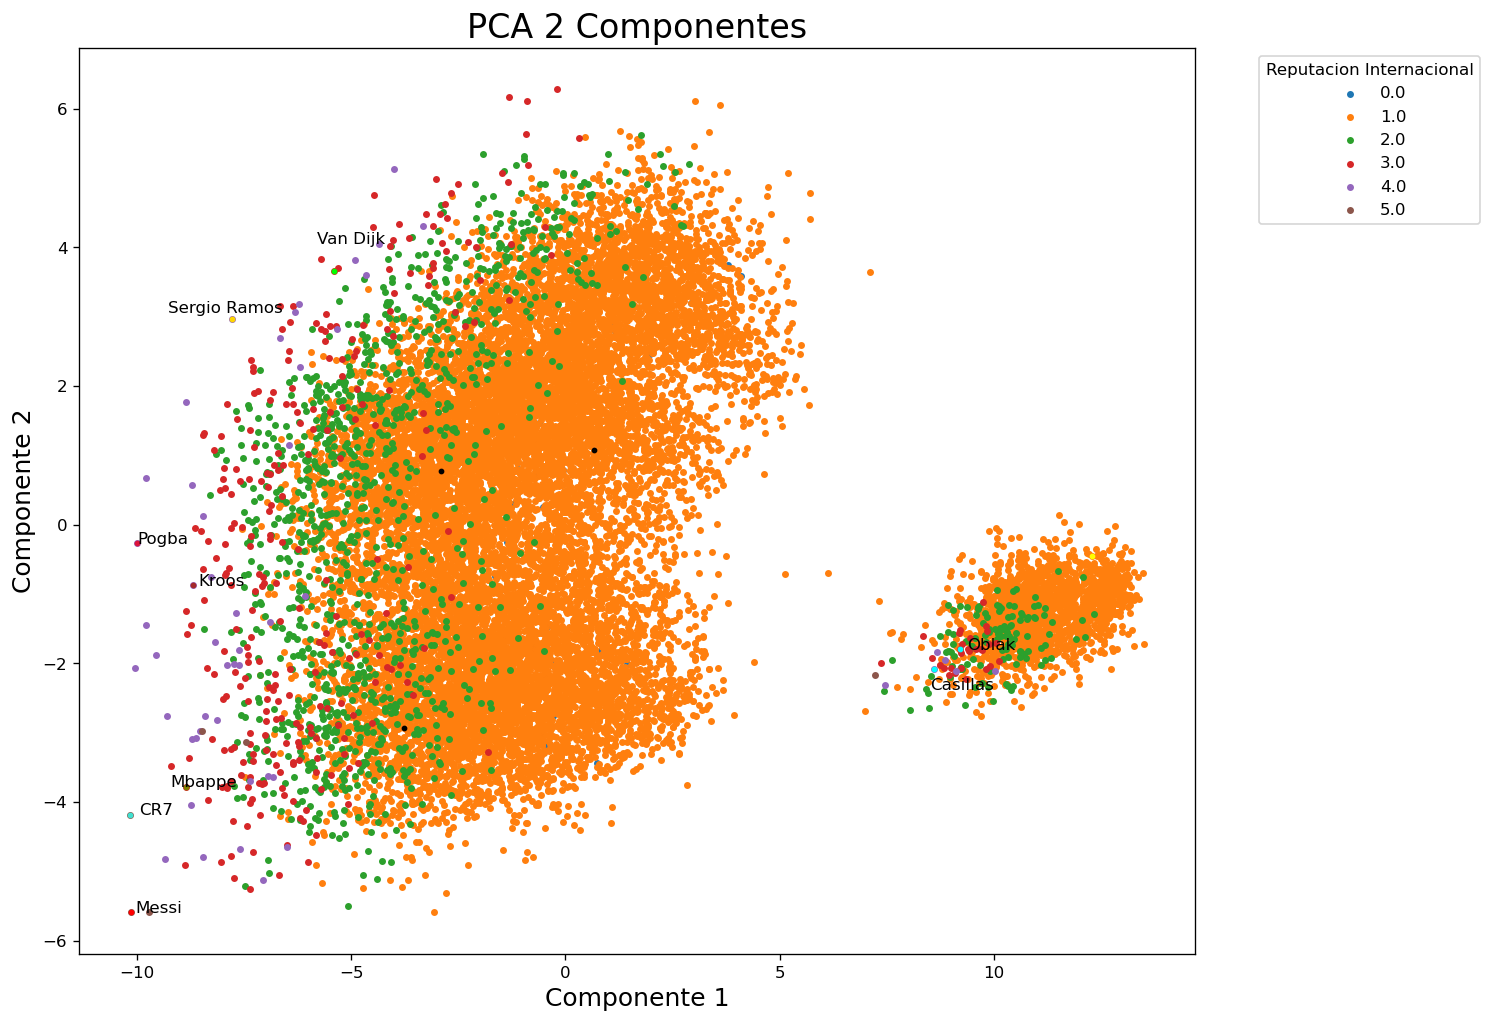

In [31]:
fig = plt.figure(figsize = (12,10), dpi=120)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)

targets = finalDf['International Reputation'].values
for target in set(targets):
    indicesToKeep = finalDf['International Reputation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente 1'],
               finalDf.loc[indicesToKeep, 'Componente 2'],
               s = 10)
    
#Datos de los jugadores elegidos

#Messi
ax.scatter(datosMessiX,datosMessiY,c='r',s=6)
ax.text(datosMessiX+1.2,datosMessiY,'Messi',horizontalalignment='right',fontsize=10)

#Cristiano Ronaldo
ax.scatter(datosCRX,datosCRY,c='turquoise',s=6)
ax.text(datosCRX+1,datosCRY,'CR7',horizontalalignment='right',fontsize=10)

#Mbappe
ax.scatter(datosKMX,datosKMY,c='olive',s=6)
ax.text(datosKMX+1.2,datosKMY,'Mbappe',horizontalalignment='right',fontsize=10)

#Pogba
ax.scatter(datosPPX,datosPPY,c='crimson',s=6)
ax.text(datosPPX+1.2,datosPPY,'Pogba',horizontalalignment='right',fontsize=10)

#Kroos
ax.scatter(datosTKX,datosTKY,c='brown',s=6)
ax.text(datosTKX+1.2,datosTKY,'Kroos',horizontalalignment='right',fontsize=10)

#Ramos
ax.scatter(datosSRX,datosSRY,c='gold',s=6)
ax.text(datosSRX+1.2,datosSRY+0.1,'Sergio Ramos',horizontalalignment='right',fontsize=10)

#Van Dijk
ax.scatter(datosVVX,datosVVY,c='lime',s=6)
ax.text(datosVVX+1.2,datosVVY+0.4,'Van Dijk',horizontalalignment='right',fontsize=10)

#Oblak
ax.scatter(datosJOX,datosJOY,c='cyan',s=6)
ax.text(datosJOX+1.3,datosJOY,'Oblak',horizontalalignment='right',fontsize=10)

#Casillas
ax.scatter(datosICX,datosICY,c='cyan',s=6)
ax.text(datosICX+1.4,datosICY-0.3,'Casillas',horizontalalignment='right',fontsize=10)

#Jugadores Malos
ax.scatter(datosM1X,datosM1Y,c='yellow',s=6)
ax.scatter(datosM2X,datosM2Y,c='black',s=6)

ax.legend(set(targets),ncol=1, loc='upper left', bbox_to_anchor=(1.05, 1), title='Reputacion Internacional')

En el anterior gráfico de dispersión, de nuevo, podemos observar dos grupos claramente definidos. El primero, el más grande, estaría analizando las habilidades de los jugadores de campo, mientras que el de la derecha, el pequeño se centra en los porteros. Al haber separado los valores por la reputación internacional de los jugadores podemos observar como la amplia mayoría de ellos tienen una reputación internacional de 1. De 0 hay pocos valores y son poco apreciables ya que este dato lo hemos metido nosotros a mano al ser el sustituto de los valores nulos para la columna objetivo.

Respecto a los jugadores elegidos vemos como siguen distanciándose de los demás con claridad y colocados en el sitio adecuado, distanciados de los jugadores de la media del mismo modo. Al final la dispersión es exactamente igual ya que los datos siguen siendo los mismos.

### Representación de los ejes X e Y

En el uso de la libreria SciKit Learn para el cálculo del PCA, el resultado es el mismo a diferencia que se invierten las componentes. Pero al final, los ejes están representando la información del mismo modo. El Eje X en este caso se centra en aspectos de ataque y el Eje Y destaca los aspectos defensivos, si bien invierte la ponderación de cada valor, siendo los datos de los delanteros negativos y los de los porteros positivos

## Implementación 1 (Manual) vs Implementación 2 (SciKit Learn)

La diferencia en la representación de los datos solo difiere en que lo que hace SciKit Learn es invertirnos las Componentes, esto es, en SciKit Learn, la Componente 1 de nuestro Dataset es la Componente 2 en el método manual y viceversa. La verdad es que no comprendemos realmente si hay diferencia o no al representar esto así. Lo que si esta claro es que con las librerías ahorramos tiempo y cálculos intermedios, que nos pueden llevar a cometer errores.

## Conclusión

### Tras analizar estos datos mediante PCA hemos comprobado que la limpieza y normalización de los datos nos permite tratar grandes cantidades de datos de un modo más rápido y sin excesivas pérdidas de información. Debemos recordar que en este dataset tenemos más de 18000 jugadores y hemos conseguido representarlos prácticamente a todos teniendo en cuenta sus características más determinantes a la hora de darles una puntuación u otra en el juego.

### No podemos dejar de mencionar que la ventaja de PCA es poder reducir la dimensionalidad de nuestros datos para poder representarlos de otro modo. Si no hubiésemos realizado esto, probablemente el análisis de los datos habría sido una tarea bastante más larga y complicada.

### Como nota aclaratoria, respecto a la normalización es necesario hacerla con valores numéricos, de ahí que hayamos discriminado los valores con texto. Podríamos haber estandarizado los datos pero al hacer esto se aplica un sesgo a los mismos y pueden sufrir manipulaciones aunque estas no sean intencionadas que nos cambien por completo el análisis de los datos. También teníamos la ventaja de tener suficientes datos para hacer esto. Si por ejemplo hubiésemos tenido menos datos quizá habríamos tenido que plantear una normalización de algún modo que no diera demasiada importancia a unos valores y demasiada poca a otros.